### Imports

In [1]:
import os
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import pandas as pd

# plotting modules
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

### Load Data

In [2]:
df = pd.read_csv('dataset/clean_sample_data.csv')

### Preview data and shape

In [3]:
df.head(5)

,Unnamed: 0,Age,Gender,Height,Weight,BMI,Waist,Hip,Waist/Hip Ratio,BodyTemperature,SpO2,BloodPressure(sys),BloodPressure(dia),BloodGlucose,PulseRate,BloodUricAcid,Color
0,0,59,1,159.0,52.7,20.85,85.0,80,1.06,95.00,96.0,138,78,234.0,94,4.3,3
1,1,60,1,164.0,73.9,27.48,95.0,99,0.96,96.26,96.0,128,67,93.6,62,5.8,2
2,2,58,1,164.0,83.7,31.12,102.0,103,0.99,95.00,96.0,140,81,133.2,60,7.0,3
3,3,50,0,143.0,45.1,22.05,76.0,89,0.85,97.52,99.0,102,65,75.6,82,3.6,2
4,4,56,1,160.0,64.9,25.35,87.0,91,0.96,96.44,96.0,155,98,223.2,92,5.0,3


In [4]:
df.shape

(271, 17)

### Get Percentage of missing data in each column

In [5]:
df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

SpO2                  0.37
Unnamed: 0            0.00
BodyTemperature       0.00
BloodUricAcid         0.00
PulseRate             0.00
BloodGlucose          0.00
BloodPressure(dia)    0.00
BloodPressure(sys)    0.00
Waist/Hip Ratio       0.00
Age                   0.00
Hip                   0.00
Waist                 0.00
BMI                   0.00
Weight                0.00
Height                0.00
Gender                0.00
Color                 0.00
dtype: float64

### Show unique values of each non numeric columns

In [6]:
"""
    As iterative imputer is still in experimental stage
    its required to enable iterative imputer before using it
"""
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

### Imputation

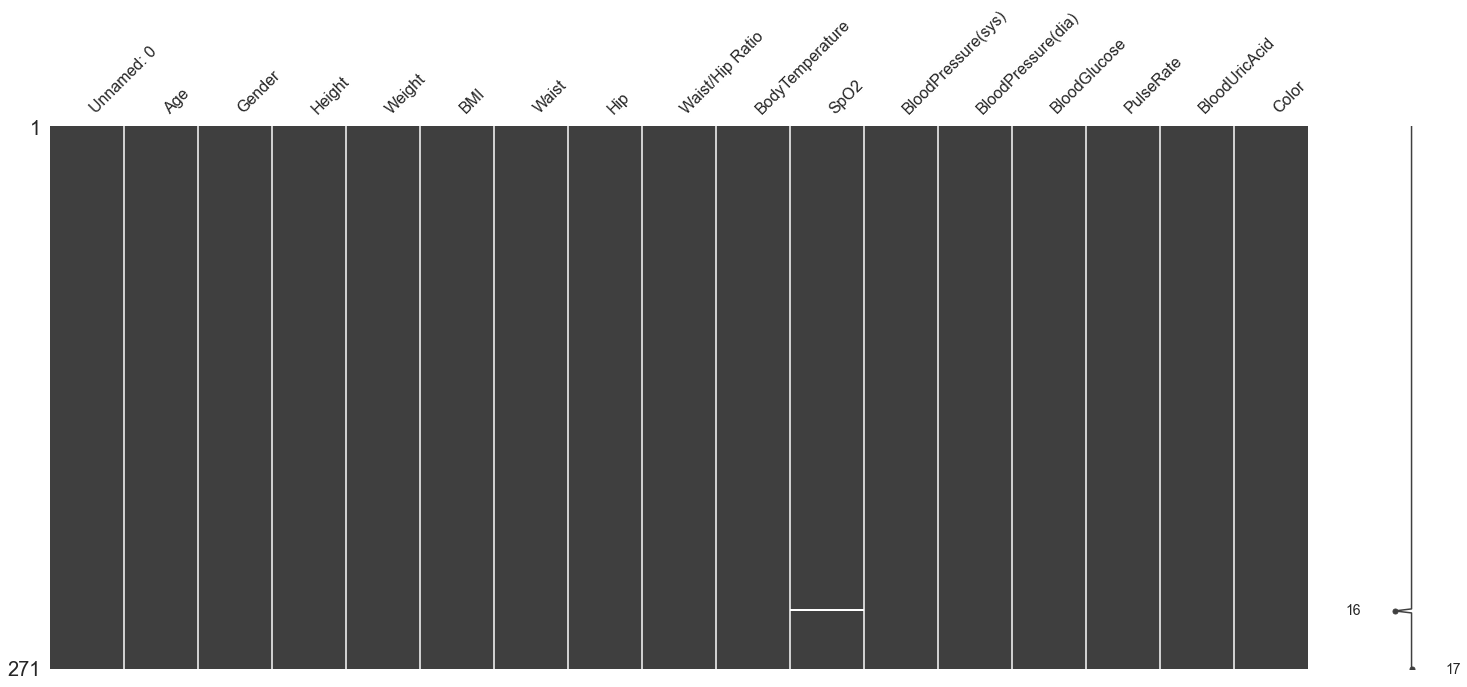

In [7]:
import missingno as msno  # # pip install missingno

# Plot correlation heatmap of missingness
msno.matrix(df);